In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
#configurando para rodar em CPU
tf.config.set_visible_devices([],'GPU')

2023-11-01 07:38:35.762427: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 07:38:35.762529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 07:38:35.764645: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 07:38:35.928927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 07:38:39.561254: I tensorflow/compiler/

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

# Classificação

#### 1. Aquisição dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

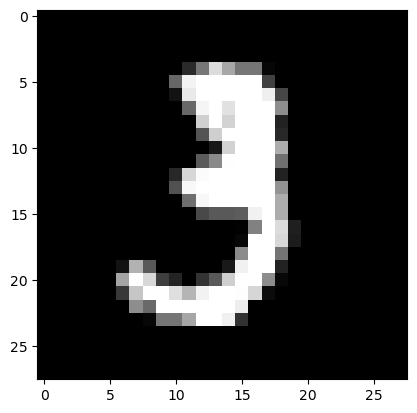

In [5]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [6]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [10]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [11]:
from keras.layers import Dense, Activation, Dropout, Flatten,  Conv2D,MaxPool2D, Conv1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [12]:
rede_simples = Sequential()
rede_simples.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
# rede_simples.add(MaxPool2D(pool_size=(2,2)))
rede_simples.add(Flatten())
rede_simples.add(Dense(25,activation='relu'))
rede_simples.add(Dense(10,activation='softmax'))

### 5. Definir otimizadores

In [13]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [14]:
x_treino = np.expand_dims(x_treino,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)

In [15]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/100


  14/1500 [..............................] - ETA: 5s - loss: 2.2920 - accuracy: 0.1406   

2023-11-01 07:38:41.373163: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6eb800c450 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-01 07:38:41.373184: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-01 07:38:41.397396: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 07:38:41.486628: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-01 07:38:41.487754: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-01 07:38:41.490979: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-01 07:38:41.49107

1044/1500 [===================>..........] - ETA: 1s - loss: 0.6571 - accuracy: 0.8092

2023-11-01 07:38:45.067144: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1500/1500 [==============================] - 7s 4ms/step - loss: 0.5615 - accuracy: 0.8364 - val_loss: 0.2993 - val_accuracy: 0.9118
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2790 - accuracy: 0.9161 - val_loss: 0.2409 - val_accuracy: 0.9315
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2288 - accuracy: 0.9314 - val_loss: 0.2205 - val_accuracy: 0.9368
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1966 - accuracy: 0.9410 - val_loss: 0.2194 - val_accuracy: 0.9333
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1733 - accuracy: 0.9464 - val_loss: 0.1849 - val_accuracy: 0.9437
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1557 - accuracy: 0.9514 - val_loss: 0.1696 - val_accuracy: 0.9488
Epoch 7/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1412 - accuracy: 0.9567 - val_loss: 0.1736 - val_accuracy: 0.94

##### 7. Avaliação do modelo

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_test = np.expand_dims(x_test,axis=-1)
pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.9573

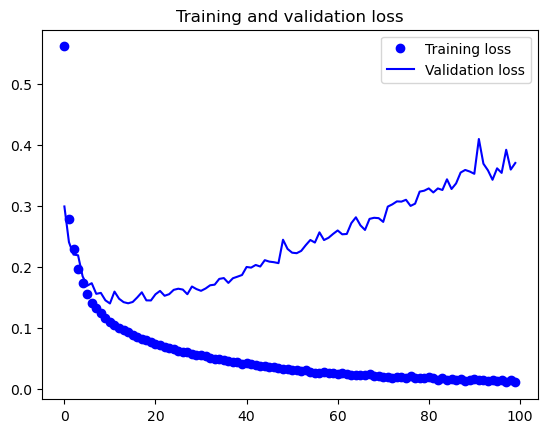

In [17]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [18]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0150 - accuracy: 0.9945 - val_loss: 0.3764 - val_accuracy: 0.9527
Epoch 2/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.3811 - val_accuracy: 0.9538
Epoch 3/150
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0134 - accuracy: 0.9952 - val_loss: 0.3900 - val_accuracy: 0.9513
Epoch 4/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.3790 - val_accuracy: 0.9513
Epoch 5/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0129 - accuracy: 0.9952 - val_loss: 0.3994 - val_accuracy: 0.9511
Epoch 6/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0140 - accuracy: 0.9948 - val_loss: 0.3758 - val_accuracy: 0.9515
Epoch 7/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.3886 - val_ac

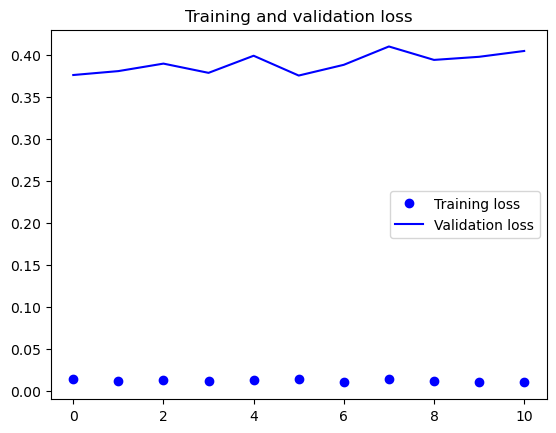

In [19]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.9571

In [21]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 958,    0,    4,    1,    0,    1,   10,    1,    5,    0],
       [   0, 1123,    4,    0,    1,    0,    2,    3,    2,    0],
       [   2,    4,  995,    5,    3,    0,    4,   10,    4,    5],
       [   1,    0,   14,  963,    0,    7,    0,    7,   11,    7],
       [   1,    1,    7,    0,  950,    0,    3,    1,    0,   19],
       [   1,    2,    3,   13,    1,  842,   13,    0,   10,    7],
       [  19,    2,    3,    0,    2,    2,  928,    0,    1,    1],
       [   0,    8,   12,    5,    5,    0,    0,  984,    4,   10],
       [  16,    6,   29,    6,    1,    5,    3,   12,  888,    8],
       [   3,    5,    4,    1,   32,    4,    1,   12,    7,  940]])

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [22]:
rede_dropout = Sequential()
rede_dropout.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(MaxPool2D(pool_size=(2,2)))
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,activation='relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(10,activation='softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [23]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7667 - accuracy: 0.7523 - val_loss: 0.3577 - val_accuracy: 0.9131
Epoch 2/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4539 - accuracy: 0.8606 - val_loss: 0.2887 - val_accuracy: 0.9201
Epoch 3/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4175 - accuracy: 0.8706 - val_loss: 0.2788 - val_accuracy: 0.9217
Epoch 4/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3965 - accuracy: 0.8756 - val_loss: 0.2690 - val_accuracy: 0.9299
Epoch 5/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3805 - accuracy: 0.8806 - val_loss: 0.2590 - val_accuracy: 0.9318
Epoch 6/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3696 - accuracy: 0.8829 - val_loss: 0.2466 - val_accuracy: 0.9342
Epoch 7/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3657 - accuracy: 0.8844 - val_loss: 0.2372 - val_ac

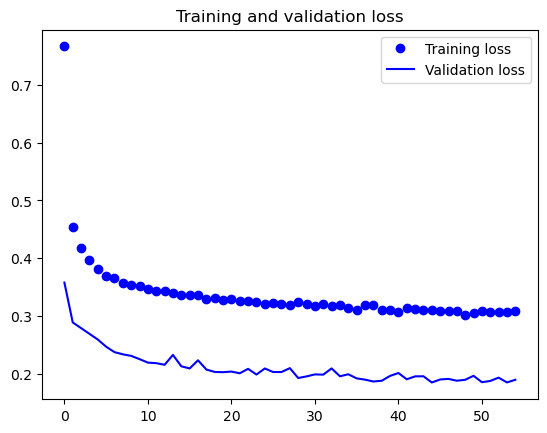

In [24]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

166/313 [==============>...............] - ETA: 0s

313/313 [==============================] - 1s 3ms/step


0.9479

In [26]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 970,    0,    0,    1,    4,    1,    2,    1,    1,    0],
       [   0, 1106,    4,    2,    0,    1,    6,    0,   16,    0],
       [   7,    1,  963,   10,    9,    1,    8,    9,   24,    0],
       [   3,    2,   16,  941,    0,   14,    0,   16,   14,    4],
       [   0,    0,    3,    0,  946,    0,   10,    4,    2,   17],
       [  10,    0,    1,   15,    4,  830,   16,    5,    8,    3],
       [  12,    2,    0,    0,    7,    5,  931,    0,    1,    0],
       [   2,    8,   16,    4,    3,    0,    0,  980,    0,   15],
       [  17,    6,    3,    4,    9,   10,   13,   11,  896,    5],
       [   8,    6,    1,   10,   42,    7,    0,   14,    5,  916]])

# Regressão

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [28]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [29]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [30]:
model = Sequential()
model.add(Conv1D(3,1, activation='relu', input_shape=(len(x_train[1]),1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 3)             6         
                                                                 
 dense_4 (Dense)             (None, 13, 64)            256       
                                                                 
 dense_5 (Dense)             (None, 13, 1)             65        
                                                                 
Total params: 327 (1.28 KB)
Trainable params: 327 (1.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
x_treino = np.expand_dims(x_treino,axis=1)

In [33]:
x_train = np.expand_dims(x_train,axis=-1)

In [34]:
valid = (x_val,y_val)

In [35]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
callbacks = [es]
historico = model.fit(x_train, 
                             y_train, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_split = 0.2 ,
                             shuffle=True,
                             callbacks = callbacks)

Epoch 1/150
6/6 [==============================] - 1s 44ms/step - loss: 571.0369 - mae: 22.0644 - val_loss: 638.9532 - val_mae: 23.5463
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 565.8749 - mae: 21.9482 - val_loss: 634.3478 - val_mae: 23.4480
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 561.5872 - mae: 21.8503 - val_loss: 629.1774 - val_mae: 23.3370
Epoch 4/150
6/6 [==============================] - 0s 7ms/step - loss: 556.9340 - mae: 21.7431 - val_loss: 624.4966 - val_mae: 23.2359
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 552.6193 - mae: 21.6426 - val_loss: 619.5878 - val_mae: 23.1292
Epoch 6/150
6/6 [==============================] - 0s 7ms/step - loss: 548.0963 - mae: 21.5372 - val_loss: 614.7988 - val_mae: 23.0244
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 543.6354 - mae: 21.4319 - val_loss: 609.9155 - val_mae: 22.9168
Epoch 8/150
6/6 [==============================] - 0s 

2023-11-01 07:58:56.628067: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


6/6 [==============================] - 0s 8ms/step - loss: 513.1032 - mae: 20.6915 - val_loss: 575.6897 - val_mae: 22.1423
Epoch 14/150
6/6 [==============================] - 0s 7ms/step - loss: 507.2245 - mae: 20.5448 - val_loss: 569.1984 - val_mae: 21.9911
Epoch 15/150
1/6 [====>.........................] - ETA: 0s - loss: 616.4890 - mae: 22.3848

6/6 [==============================] - 0s 14ms/step - loss: 501.1854 - mae: 20.3907 - val_loss: 562.5417 - val_mae: 21.8345
Epoch 16/150
6/6 [==============================] - 0s 10ms/step - loss: 494.8015 - mae: 20.2340 - val_loss: 554.2441 - val_mae: 21.6369
Epoch 17/150
6/6 [==============================] - 0s 8ms/step - loss: 487.7415 - mae: 20.0463 - val_loss: 547.6615 - val_mae: 21.4786
Epoch 18/150
6/6 [==============================] - 0s 10ms/step - loss: 481.5125 - mae: 19.8834 - val_loss: 540.8677 - val_mae: 21.3133
Epoch 19/150
6/6 [==============================] - 0s 8ms/step - loss: 475.0937 - mae: 19.7183 - val_loss: 533.5137 - val_mae: 21.1325
Epoch 20/150
6/6 [==============================] - 0s 8ms/step - loss: 468.3385 - mae: 19.5363 - val_loss: 525.1732 - val_mae: 20.9246
Epoch 21/150
6/6 [==============================] - 0s 8ms/step - loss: 460.7863 - mae: 19.3329 - val_loss: 516.2161 - val_mae: 20.6983
Epoch 22/150
6/6 [==============================] - 0s 7ms

In [36]:
x_test = np.expand_dims(x_test, axis=-1)

In [37]:
x_test.shape

(102, 13, 1)

In [38]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, np.mean(pred_simples,axis=1))

6.500792185465495

In [41]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = np.mean(pred_simples,axis=1)

resultado

,y_test,y_pred
0,7.2,21.813637
1,18.8,21.840685
2,19.0,21.864235
3,27.0,21.848049
4,22.2,21.882021
...,...,...
97,21.9,21.789042
98,24.1,21.873312
99,50.0,21.833744
100,26.7,21.841642
